# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [6]:
cities

['busselton',
 'punta arenas',
 'tyrma',
 'albany',
 'thompson',
 'ambilobe',
 'cape town',
 'cedar city',
 'belushya guba',
 'kruisfontein',
 'qaanaaq',
 'shimoda',
 'rikitea',
 'batemans bay',
 'srednekolymsk',
 'iqaluit',
 'kodiak',
 'vostok',
 'kalmthout',
 'atuona',
 'cherskiy',
 'bargal',
 'new norfolk',
 'along',
 'umzimvubu',
 'lolua',
 'faya',
 'polovinnoye',
 'north bend',
 'carnarvon',
 'san luis',
 'upernavik',
 'kondoa',
 'kysyl-syr',
 'muisne',
 'fortuna',
 'ugoofaaru',
 'saskylakh',
 'east london',
 'port lincoln',
 'eureka',
 'powell river',
 'le vauclin',
 'chavakkad',
 'ponta do sol',
 'kapaa',
 'tecoanapa',
 'bengkulu',
 'taolanaro',
 'mataura',
 'barrow',
 'saleaula',
 'lerwick',
 'hithadhoo',
 'san andres',
 'ancud',
 'pangody',
 'buraydah',
 'nidzica',
 'vaini',
 'billings',
 'ravar',
 'port hardy',
 'hobart',
 'port alfred',
 'mizdah',
 'hibbing',
 'dunedin',
 'sibu',
 'bluff',
 'butaritari',
 'arraial do cabo',
 'hermanus',
 'sukhovolya',
 'chengde',
 'ushuaia',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Request the results in fahrenheit
units = "imperial"

raw_count = 0
sets = 1

# Initialize empty list
city_list = []
country_list = []
date_list = []
temp_list = []
lat_list = []
lon_list = []
humidity_list = []
clounds_list = []
wind_list = []

print("Beginning Data Retrieval")
print(f"------------------------")
# use iterrows to iterate through pandas dataframe
for city in cities:
    target_url = f"{url}appid={api_key}&q={city}&units={units}"
    city_data_response = requests.get(target_url)
    city_data_json = city_data_response.json()
    
    if city_data_json["cod"] == 200:
        raw_count = raw_count + 1
        if (raw_count % 50 == 0):
           # Reset records. Increment sets
           raw_count = 0
           sets = sets + 1
    
        print(f"Proceesing Record {raw_count} of Set {sets} | {city}")
        
        city_list.append(city)
        country_list.append(city_data_json["sys"]["country"])
        date_list.append(city_data_json["dt"])
        temp_list.append(city_data_json["main"]["temp"])
        lat_list.append(city_data_json["coord"]["lat"])
        lon_list.append(city_data_json["coord"]["lon"])
        humidity_list.append(city_data_json["main"]["humidity"])
        clounds_list.append(city_data_json["clouds"]["all"])
        wind_list.append(city_data_json["wind"]["speed"])

    else:
        print(f"City not found. skipping...")
       
print(f"------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------")


Beginning Data Retrieval
------------------------
City not found. skipping...
Proceesing Record 1 of Set 1 | dingle
Proceesing Record 2 of Set 1 | bredasdorp
Proceesing Record 3 of Set 1 | los llanos de aridane
City not found. skipping...
Proceesing Record 4 of Set 1 | qaanaaq
Proceesing Record 5 of Set 1 | punta arenas
Proceesing Record 6 of Set 1 | port alfred
Proceesing Record 7 of Set 1 | kapaa
Proceesing Record 8 of Set 1 | cherskiy
Proceesing Record 9 of Set 1 | georgetown
Proceesing Record 10 of Set 1 | avarua
City not found. skipping...
Proceesing Record 11 of Set 1 | eureka
Proceesing Record 12 of Set 1 | barrow
Proceesing Record 13 of Set 1 | reforma
Proceesing Record 14 of Set 1 | ushuaia
Proceesing Record 15 of Set 1 | hithadhoo
City not found. skipping...
City not found. skipping...
Proceesing Record 16 of Set 1 | tuktoyaktuk
Proceesing Record 17 of Set 1 | puerto ayora
Proceesing Record 18 of Set 1 | faanui
Proceesing Record 19 of Set 1 | rikitea
City not found. skipping.

Proceesing Record 37 of Set 4 | maniitsoq
Proceesing Record 38 of Set 4 | xuddur
City not found. skipping...
Proceesing Record 39 of Set 4 | barcelos
Proceesing Record 40 of Set 4 | sangar
Proceesing Record 41 of Set 4 | altay
Proceesing Record 42 of Set 4 | leh
Proceesing Record 43 of Set 4 | ponta do sol
Proceesing Record 44 of Set 4 | santa cruz de tenerife
Proceesing Record 45 of Set 4 | goderich
Proceesing Record 46 of Set 4 | mount gambier
Proceesing Record 47 of Set 4 | esperance
Proceesing Record 48 of Set 4 | vostok
Proceesing Record 49 of Set 4 | faya
Proceesing Record 0 of Set 5 | gamba
Proceesing Record 1 of Set 5 | aripuana
Proceesing Record 2 of Set 5 | xining
Proceesing Record 3 of Set 5 | talara
Proceesing Record 4 of Set 5 | gaoual
Proceesing Record 5 of Set 5 | beringovskiy
Proceesing Record 6 of Set 5 | slave lake
Proceesing Record 7 of Set 5 | meulaboh
Proceesing Record 8 of Set 5 | puerto madryn
City not found. skipping...
Proceesing Record 9 of Set 5 | acari
Proce

Proceesing Record 21 of Set 8 | zyryanka
Proceesing Record 22 of Set 8 | yumen
Proceesing Record 23 of Set 8 | havelock
Proceesing Record 24 of Set 8 | victoria
Proceesing Record 25 of Set 8 | pevek
Proceesing Record 26 of Set 8 | palana
Proceesing Record 27 of Set 8 | hobyo
Proceesing Record 28 of Set 8 | pavlovsk
Proceesing Record 29 of Set 8 | polczyn-zdroj
Proceesing Record 30 of Set 8 | novo aripuana
Proceesing Record 31 of Set 8 | novikovo
Proceesing Record 32 of Set 8 | marsabit
Proceesing Record 33 of Set 8 | shingu
Proceesing Record 34 of Set 8 | tomigusuku
Proceesing Record 35 of Set 8 | qaqortoq
Proceesing Record 36 of Set 8 | meadow lake
Proceesing Record 37 of Set 8 | normandin
Proceesing Record 38 of Set 8 | lavrentiya
Proceesing Record 39 of Set 8 | jacareacanga
Proceesing Record 40 of Set 8 | laguna
Proceesing Record 41 of Set 8 | gualeguay
Proceesing Record 42 of Set 8 | tabou
Proceesing Record 43 of Set 8 | miri
City not found. skipping...
Proceesing Record 44 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
# Create dataframe from raw data
city_weather_df = pd.DataFrame({"City": city_list,
                   "Cloudiness": clounds_list,
                   "Country": country_list,
                   "Date": date_list,
                   "Humidity": humidity_list,
                   "Lat": lat_list,
                   "Lng": lon_list,
                   "Max Temp": temp_list,
                   "Wind Speed": wind_list})

In [55]:
city_weather_df.count()

level_0       529
index         529
City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [64]:
city_weather_df.to_csv(output_data_file, index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

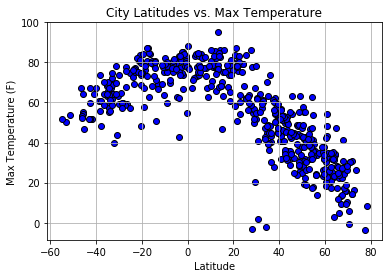

In [63]:
latitude = list(city_weather_df["Lat"])
max_temp = list(city_weather_df["Max Temp"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Max Temperature"
plt.title(title)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

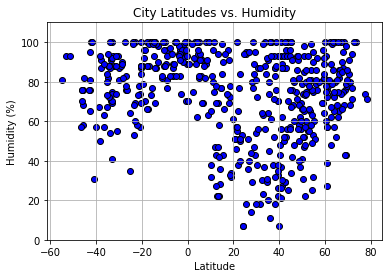

In [67]:
latitude = list(city_weather_df["Lat"])
humidity = list(city_weather_df["Humidity"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, humidity, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Humidity"
plt.title(title)
plt.grid(True)
plt.ylim([0, 110])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

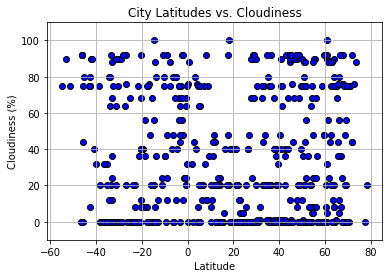

In [69]:
latitude = list(city_weather_df["Lat"])
cloudiness = list(city_weather_df["Cloudiness"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Cloudiness"
plt.title(title)
plt.grid(True)
plt.ylim([-10, 110])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

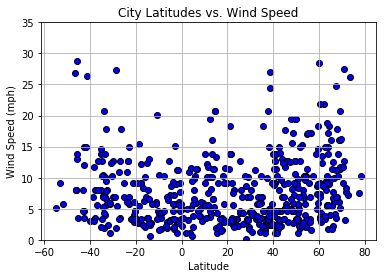

In [72]:
latitude = list(city_weather_df["Lat"])
wind_speed = list(city_weather_df["Wind Speed"])

# Use matplotlib to create a scatter plot based upon the above data
plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", linewidth=1, edgecolors="black")

# Create a title, x label, and y label for our chart
title = f"City Latitudes vs. Wind Speed"
plt.title(title)
plt.grid(True)
plt.ylim([0, 35])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")